In [1]:
# Test a click track


In [2]:
from maelzel.core import *

csoundengine.magic extension loaded
Magics available: %csound, %%csound, %%definstr


Group([4A#:2.5♩:start=0.333, 4C+:1.5♩:start=2])
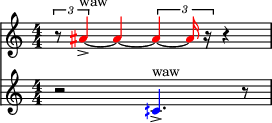

In [63]:
notes = [Note(60.5, dur=1.5, start=2).setPlay(position=0), Note(70, dur=2.5, start=1/3).setPlay(position=1)]
g = Group(notes)
g.setSymbol('articulation', 'accent').setSymbol(symbols.Expression('waw'))
# items in containers are sorted by start time
notes[0].setSymbol('color', 'blue')
g[0].setSymbol('color', 'red')
g

Calls to `setSymbol` can be chained. Also, a Symbol itself can be used as argument

[Notehead(default, color=red, size=1.4), Accidental(parenthesis=True), Articulation(kind=accent)]


4C+:0.5♩
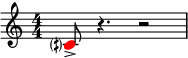

In [70]:
n = Note(60.5, dur=0.5)
n.setSymbol('notehead', color='red', size=1.4).setSymbol('accidental', parenthesis=True)
# 
n.setSymbol(symbols.Articulation('accent'))
print(n._symbols)
n

Notice the difference between resizing the notehead alone and resizing the note itself

[<maelzel.core.symbols.SizeFactor object at 0x7f6f4c964550>, Accidental(parenthesis=True), Articulation(kind=accent)]


4C+:0.5♩
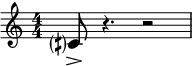

In [69]:
n = Note(60.5, dur=0.5)
n.setSymbol('sizefactor', 1.4)
n.setSymbol('accidental', parenthesis=True)
n.setSymbol('articulation', 'accent')
print(n._symbols)
n

Some symbols (like size or color) are exclusive, others can be accumulated

In [77]:
%%html 
<style> table {float:left !important} </style>



| Symbol       | Exclusive? |
|--------------|------------|
| Color        | Yes        |
| SizeFactor   | Yes        |
| Articulation | Yes        |
| Dynamic      | Yes        |
| Notehead     | Yes        |
| Expression   | No         |

4G+:2♩
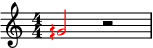

In [73]:
# Color is exclusive

Note("4G+", dur=2).setSymbol('color', 'blue').setSymbol('color', 'red')

4G+:2♩
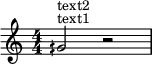

In [75]:
# Expressions can be accumulated

Note("4G+", dur=2).setSymbol(symbols.Expression('text1')).setSymbol(symbols.Expression('text2'))

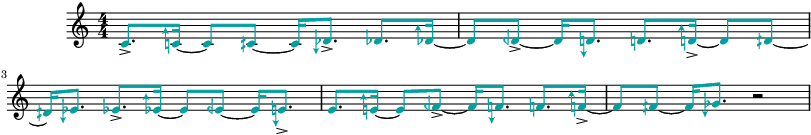

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=24)
    Synth(𝍪 preset.piano:1002.0392, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.7 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=60 ...)
    Synth(𝍪 preset.piano:1002.0393, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=60.25 ...)
    Synth(𝍪 preset.piano:1002.0394, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=60.5 ...)
    Synth(𝍪 preset.piano:1002.0395, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.7 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=60.75 ...)
    Synth(𝍪 preset.piano:1002.0396, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=61 ...)
    Synth(𝍪 preset.piano:1002.0397, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=61.25 ...)
    Synth(𝍪 preset.piano:1002.0398, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.7 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=61.5 ...)
    Synth(𝍪 preset.piano:1002.0399, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=61.75 ...)
    Synth(𝍪 preset.piano:1002.04, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=62 ...)
    Synth(𝍪 preset.piano:1002.0401, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.7 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=62.25 ...)
    Synth(𝍪 preset.piano:1002.0402, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=62.5 ...)
    Synth(𝍪 preset.piano:1002.0403, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=62.75 ...)
    Synth(𝍪 preset.piano:1002.0404, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.7 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=63 ...)
    Synth(𝍪 preset.piano:1002.0405, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=63.25 ...)
    Synth(𝍪 preset.piano:1002.0406, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=63.5 ...)
    Synth(𝍪 preset.piano:1002.0407, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.7 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=63.75 ...)
    Synth(𝍪 preset.piano:1002.0408, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=64 ...)
    Synth(𝍪 preset.piano:1002.0409, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=64.25 ...)
    Synth(𝍪 preset.piano:1002.041, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.7 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=64.5 ...)
    Synth(𝍪 preset.piano:1002.0411, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=0.1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=64.75 ...)
    Synth(𝍪 preset.piano:1002.0412, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:

In [118]:
ch = Chain([Note(60+m*0.25, dur=3/4) for m in range(24)])
ch.setSymbol('color', '#00A0A0')
ch.setPlay(fade=0, instr='piano')
for n in ch:
    n.setPlay(gain=0.1)
for n in ch[::3]:
    n.setSymbol('articulation', 'accent')
    n.setPlay(gain=0.7)
ch.show()
ch.play()


Chain([4C:0.5♩:start=0, 4C#:0.5♩:start=0.5, 4D:0.5♩:start=1, 4D#:0.5♩:start=1.5, 4E:0.5♩:start=2, 4F:0.5♩:start=2.5, 4F#:0.5♩:start=3, 4G:0.5♩:start=3.5, 4G#:0.5♩:start=4, 4A:0.5♩:start=4.5, …])
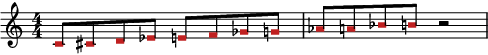

In [119]:
ch = Chain([Note(m, dur=0.5) for m in range(60, 72)])
ch.setSymbol('notehead', 'square', color='#c02020')
ch

Chain([4C:0.25♩:start=0, 4C#:0.25♩:start=0.25, 4D:0.25♩:start=0.5, 4D#:0.25♩:start=0.75, 4E:0.25♩:start=1, 4F:0.25♩:start=1.25, 4F#:0.25♩:start=1.5, 4G:0.25♩:start=1.75, 4G#:0.25♩:start=2, 4A:0.25♩:start=2.25, …])
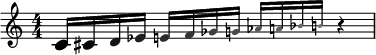

In [120]:
def rgbtohex(r, g, b):
    return '#%02x%02x%02x'% (r, g, b)
    
ch = Chain([Note(m, 0.25) for m in range(60, 72)])
for i, n in enumerate(ch):
    di = i/len(ch)
    r = di*0.5
    col = rgbtohex(int(255*r), int(255*r), int(255*r))
    n.setSymbol('notehead', color=col, size=0.5+(1-di)*1.0)
ch

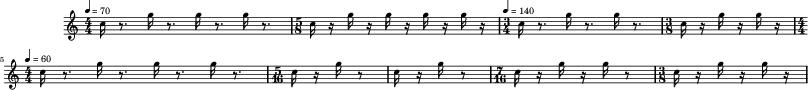



--Csound version 6.18 (double samples) Mar  4 2022
[commit: da7bc6fed291c7a0608bfab9ea7d2d1a11067761]
libsndfile-1.0.31
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 512 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 1024 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [3]:
scorestruct = ScoreStruct.fromString(r'''
4/4, 70
5/8
3/4, 140
3/8
4/4, 60
5/16
.
7/16
3/8
...
''')

ct = scorestruct.makeClickTrack(clickdur=0.25)
with Workspace(updates={'quant.complexity':'high'}):
    ct.show()
    ct.play()

In [5]:
ct.rec('/home/em/tmp/foo.wav', fade=0)

'/home/em/tmp/foo.wav'

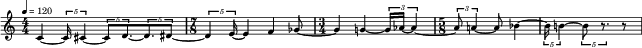

0, 4/4, 60


In [3]:
scorestruct = ScoreStruct.fromString(r'''
4/4, 120
7/8
3/4, 120
5/8
...
''')
notes = Chain([Note(m, dur=6/5) for i, m in enumerate(range(60, 72))])
# Used as a context manager, the workspace is temporary: the previous
# workspace is restored after the context manager exits
with Workspace(scorestruct=scorestruct) as w:
    notes.show()
getWorkspace().scorestruct.dump()


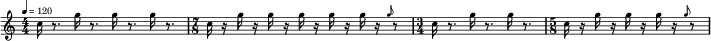

In [4]:
clicktrack = scorestruct.makeClickTrack(clickdur=0.25)
cfg = newConfig(updates={'quant.complexity':'high'})
clicktrack


In [7]:
clicktrack.play(scorestruct=scorestruct)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=19)
    Synth(𝍪 preset..click:1001.004, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=72 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.0041, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.0042, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.0043, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.0044, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=72 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.0045, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.0046, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.0047, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.0048, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.0049, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.005, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.1 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.125 ...)
    Synth(𝍪 preset..click:1001.0051, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.0625 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=72 p18=1 p19=0.0625 ...)
    Synth(𝍪 preset..click:1001.0052, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.0625 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.0625 ...)
    Synth(𝍪 preset..click:1001.0053, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.0625 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.0625 ...)
    Synth(𝍪 preset..click:1001.0054, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.0625 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=72 p18=1 p19=0.0625 ...)
    Synth(𝍪 preset..click:1001.0055, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.0625 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.0625 ...)
    Synth(𝍪 preset..click:1001.0056, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.0625 ipchintrp_:13=0 ifadekind_:14=1 ktransp:15=24 p16=0 p17=79 p18=1 p19=0.0625 ...)
    Synth(𝍪 preset..click:1001.0057, p4=0 idataidx_:5=16 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.0001 ifade1:12=0.0625 ipchin

In [7]:
notes.play(scorestruct=scorestruct)


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=12)
    Synth(𝍪 preset.sin:1001.0014, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=60 ...)
    Synth(𝍪 preset.sin:1001.0015, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=61 ...)
    Synth(𝍪 preset.sin:1001.0016, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=62 ...)
    Synth(𝍪 preset.sin:1001.0017, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=63 ...)
    Synth(𝍪 preset.sin:1001.0018, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=64 ...)
    Synth(𝍪 preset.sin:1001.0019, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=65 ...)
    Synth(𝍪 preset.sin:1001.002, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=66 ...)
    Synth(𝍪 preset.sin:1001.0021, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=67 ...)
    Synth(𝍪 preset.sin:1001.0022, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=68 ...)
    Synth(𝍪 preset.sin:1001.0023, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=69 ...)
    Synth(𝍪 preset.sin:1001.0024, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=70 ...)
    Synth(𝍪 preset.sin:1001.0025, p4=0 idataidx_:5=15 inumbps:6=2 ibplen:7=3 igain_:8=1 ichan_:9=1 ipos:10=-1 ifade0:11=0.02 ifade1:12=0.02 ipchintrp_:13=0 ifadekind_:14=1 p15=0 p16=71 ...)

In [3]:
c = activeConfig().clone()

In [12]:
c['quant.complexity'] = 'high'

In [5]:
scorestruct = r"""
1, 4/4
3, 3/4
4, 3/8
   5/8,,my label
   7/8
   4/4
12, 3/16
    5/16
15, 3/4
"""

In [6]:
ss = ScoreStruct.fromString(scorestruct)
ss

Meas. Index,Timesig,Tempo (quarter note),Label
0,4/4,60,
1,4/4,,
2,4/4,,
3,3/4,,
4,3/8,,
5,5/8,,my label
6,7/8,,
7,4/4,,
8,4/4,,
9,4/4,,


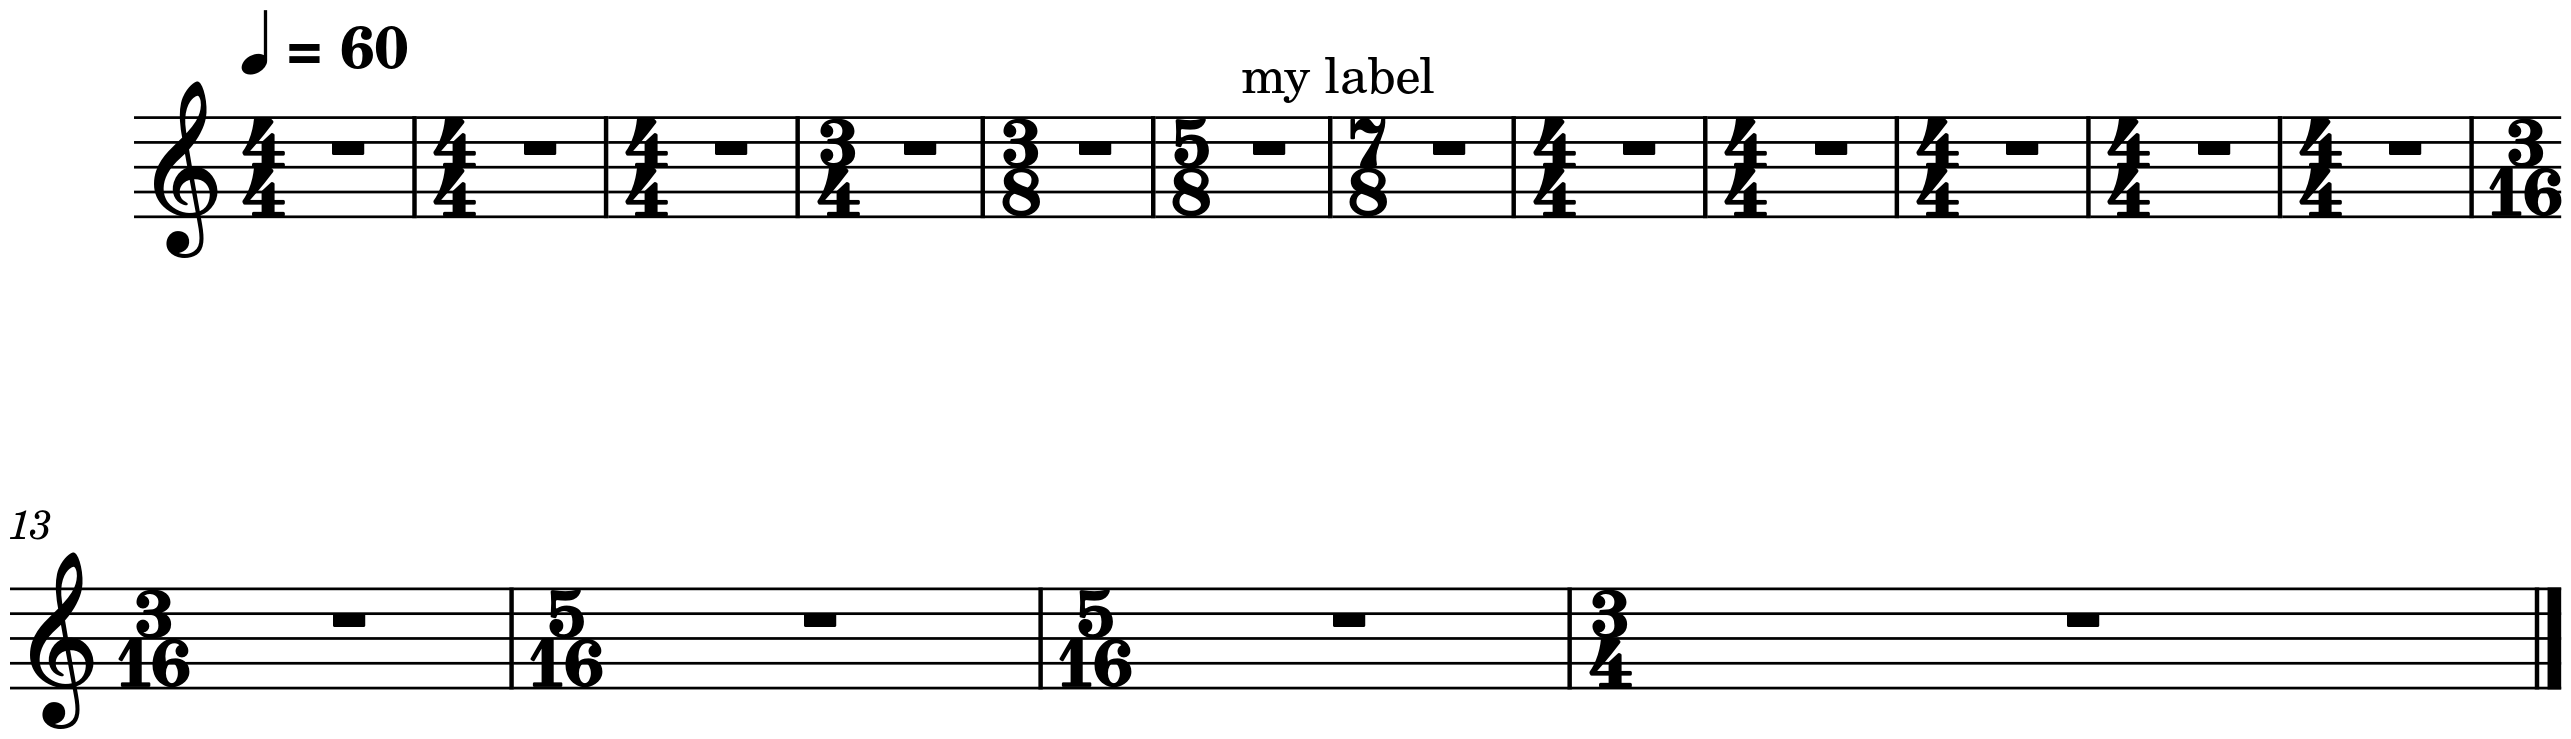

In [5]:
ss.show()


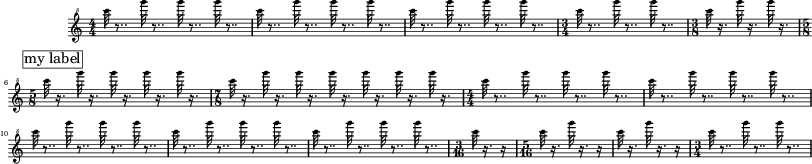

In [19]:
ct = ss.makeClickTrack(clickdur=1/8)
ct


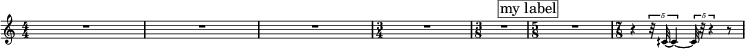

In [18]:
Note(60.45, start=20+1/12).show(scorestruct=ss, config=c)

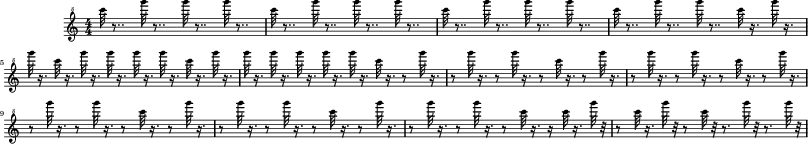

In [6]:
ct.show()



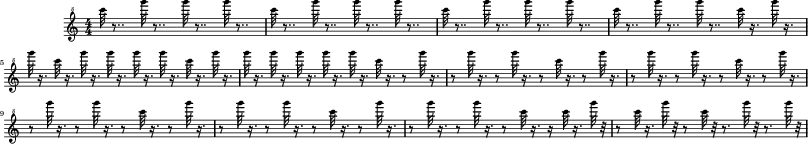

In [7]:
ct

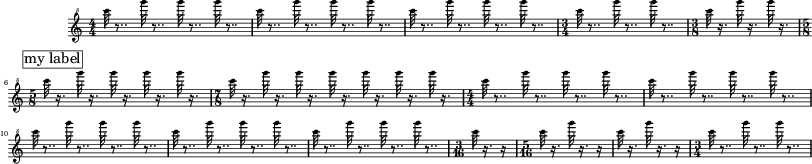

In [14]:
ct.show(scorestruct=ss)

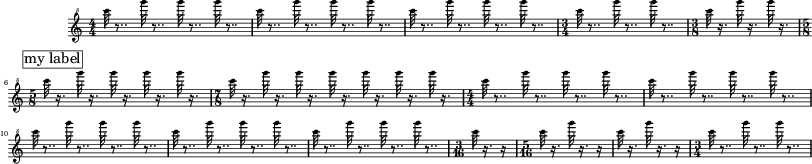

In [13]:
with Workspace(scorestruct=ss) as w:
    ct.show()

In [10]:
r = ct.render(scorestruct=ss)


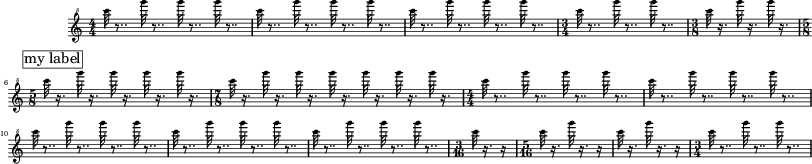

In [12]:
r

In [9]:
p = r.score.parts[0]

In [18]:
r.write("/home/em/tmp/treble.ly")